<a href="https://colab.research.google.com/github/Julio-M39/Real-ESRGAN_Upscaling/blob/main/Real_ESRGAN_Upscaling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-ESRGAN

Super-resolução (SR) é o upsampling de uma imagem de baixa resolução para uma resolução mais alta com distorção mínima de informações.

Para entender melhor: [ESRGAN — Utilizando machine learning para aprimorar imagens e realizar upscaling com maior qualidade.](https://medium.com/@leommh/esrgan-utilizando-machine-learning-para-aprimorar-imagens-e-realizar-upscaling-com-maior-38f9f9178869).

Problema: É muito comum receber imagens de baixa resolução para trabalhar ou receber imagens que possua região de interesse pequena.

In [3]:
import skimage.io
import matplotlib.pyplot as plt

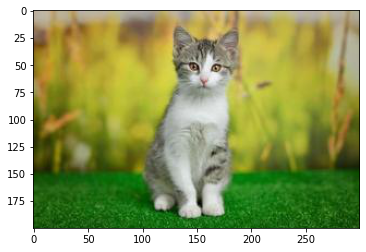

In [4]:
gato = skimage.io.imread('imagens/gato.jpg')
plt.imshow(gato)

Imagem com baixa resolução

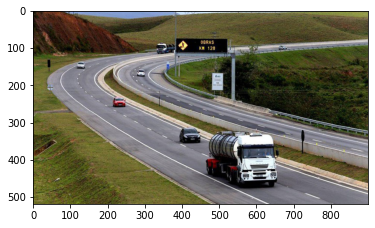

In [6]:
estrada = skimage.io.imread('imagens/estrada.jpg')
plt.imshow(estrada)

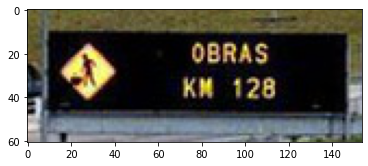

In [7]:
inte = skimage.io.imread('imagens/inte.jpg')
plt.imshow(inte)

Pequena região de interesse

# Solução com Real-ESRGAN

### Instação e configuração

In [8]:
!git clone https://github.com/xinntao/Real-ESRGAN.git

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 755, done.
remote: Total 755 (delta 0), reused 0 (delta 0), pack-reused 755
Receiving objects: 100% (755/755), 5.37 MiB | 4.18 MiB/s, done.
Resolving deltas: 100% (410/410), done.


In [9]:
%cd Real-ESRGAN

/content/Real-ESRGAN


In [10]:
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 24.7 MB/s 
     |████████████████████████████████| 5.7 MB 51.1 MB/s 
     |████████████████████████████████| 190 kB 71.5 MB/s 
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214839 sha256=f0ca7ac925cd3dfaec6b31f4f84e1c10541c9ad64393cd971648c52148be3d89
  Stored in directory: /root/.cache/pip/wheels/4d/d3/95/e17d0bcdd7dcfb0dbf79db006711e434c42036efbf6695ef7f
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 6.2 MB/s 
     |████████████████████████████████| 177 kB 69.2 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=8fd484358b28163e995e85327d60b55cdedf2fed7aaf78524ca46121e9dd5847
  Stored in directory: /root/.cache/pip/wheels/fe/f6/cb/40331472edf4fd39

## Super resolução

Parâmetro 1: modelo

> Esse algoritmo aceita como parâmetro os seguintes modelos:

- RealESRGAN_x4plus (padrão)
- RealESRNet_x4plus
- RealESRGAN_x4plus_anime_6B
- RealESRGAN_x2plus
- realesr-animevideov3
- realesr-general-x4v3

> Parâmetro 2: pasta onde as imagens de teste estão

> Parâmetro 3: escala da super resolução (em quanto será aumentada)

In [11]:
!python inference_realesrgan.py -n RealESRGAN_x4plus -i '../imagens/gato.jpg' --outscale 4

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 381MB/s]
Testing 0 gato


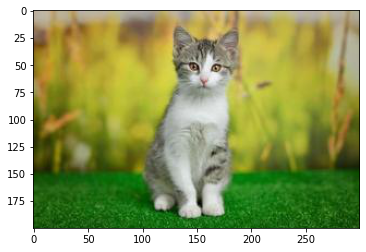

In [17]:
img_original = skimage.io.imread("../imagens/gato.jpg")
img_resultado = skimage.io.imread("results/gato_out.jpg")
plt.imshow(img_original)

Imagem de baixa resolução

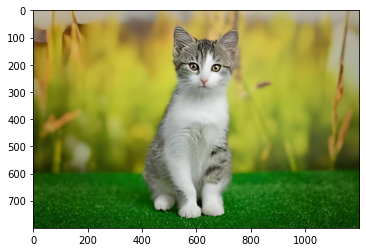

In [18]:
plt.imshow(img_resultado)

Imagem de alta resolução 

In [19]:
!python inference_realesrgan.py -n RealESRGAN_x4plus -i '../imagens/inte.jpg' --outscale 4

Testing 0 inte


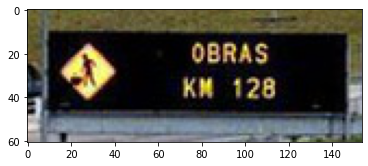

In [20]:
img_original_inte = skimage.io.imread("../imagens/inte.jpg")
img_resultado_inte = skimage.io.imread("results/inte_out.jpg")
plt.imshow(img_original_inte)

Imagem com a região de interesse em destaque com baixa resolução

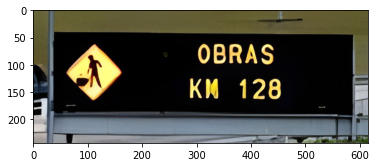

In [21]:
plt.imshow(img_resultado_inte)

Imagem com a região interesse em destaque com alta resolução